# Table of Contents

1. [Import Libraries](#1)<br>
2. [Read Training ](#2)<br>
    2.1 [Read Training ( 1 ROI FOR Each LandMark) ](#2.1)<br>
    2.2 [Read Training ( 4 ROI FOR Each LandMark) ](#2.2)<br>
3. [Read Test Data ](#3)<br>
4. [Choose LandMark and create stacked lists ](#4)<br>
5. [Split Trainig data to Train and Validation ](#5)<br>
6. [ResNet Model ](#6)<br>
    6.1 [Cteate the Model](#6.1)<br>
    6.2 [Complie Model](#6.2)<br>
    6.3 [Fit Model](#6.3)<br>
    6.4 [Losses Graphs](#6.4)<br>
7. [Make Predictions ](#7)<br>
   7.1 [Radial Error Function ](#7.1)<br>
   7.2 [Successful Detection Rate Function (SDR)](#7.2)<br>
   7.3 [Radial Error)](#7.3)<br>
   7.4 [BoxPlot](#7.4)<br>
   



# 🟡 Import Libraries <a id = "1"><a>

In [ ]:
import seaborn as sns
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import PIL
from PIL import Image , ImageDraw
import random

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Input,Conv2D,MaxPooling2D,BatchNormalization,LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam ,SGD
# from sklearn.metrics import mean_squared_error as MSE_SKL
from sklearn.metrics import mean_absolute_error as MAE_SKL
# from tensorflow.keras.metrics import mean_absolute_error as MAE_TF
from tensorflow.keras.regularizers import L2
from sklearn.model_selection import train_test_split

# 🟡 Read Training Data  <a id = "2"><a>

## Read Training Data ( 1 ROI FOR Each LandMark) <a id = "2.1" > <a>

In [ ]:
# train_data_df = pd.read_csv('/kaggle/input/cephalometric-landmarks/train_senior.csv', delimiter=',')
# test1_data_df = pd.read_csv('/kaggle/input/cephalometric-landmarks/test1_senior.csv', delimiter=',')
# test2_data_df = pd.read_csv('/kaggle/input/cephalometric-landmarks/test1_senior.csv', delimiter=',')
# Train_Val_df = pd.concat([train_data_df, test1_data_df,test2_data_df.iloc[:50]])

# train_ROIs_all_img_19LM = []

# train_ROI_x_coord_all_img_19LM = []
# train_ROI_y_coord_all_img_19LM =[ ]


# for i in range(0,38,2):

#     train_ROI_x_coord = [] 
#     train_ROI_y_coord = []
#     ROI = []
    
#     for row in Train_Val_df.values: #['001.jpg', 835, 996, ..., 1569, 664, 1340]
#         image_info = list(row)
#         coords = image_info[1:] # 38       
#         offset_x =  random.randint(-10, 10)
#         offset_y =  random.randint(-10, 10)
        
#         original_img = Image.open("../input/cephalometric-landmarks/cepha400/cepha400/"+image_info[0])
        
#         croped_images = original_img.crop(( np.abs((coords[i]+offset_x ) - 128 ), np.abs((coords[i+1]+offset_y )- 128),
#                                             np.abs((coords[i]+offset_x ) + 128 ), np.abs((coords[i+1]+offset_y ) + 128 ) )) # crop( left ,top , right , bottom )
#         ROI.append(np.asarray(croped_images))
        
#         train_ROI_x_coord.append( np.abs(offset_x  - 128 ) )
#         train_ROI_y_coord.append( np.abs(offset_y  - 128 ) )
    
#     train_ROIs_all_img_19LM.append(ROI)

#     train_ROI_x_coord_all_img_19LM.append(train_ROI_x_coord)
#     train_ROI_y_coord_all_img_19LM.append(train_ROI_y_coord)
         

# print("Shape train_ROIs_all_img_19LM: ",np.array(train_ROIs_all_img_19LM).shape)      
# print("Shape train_ROI_x_coord_all_img_19LM: ",np.array(train_ROI_x_coord_all_img_19LM).shape)        
# print("Shape train_ROI_y_coord_all_img_19LM: ",np.array(train_ROI_y_coord_all_img_19LM).shape)
    

## Read Training Data ( 4 ROI FOR Each LandMark) <a id = "2.2" > <a>

In [ ]:
start = time.time()

train_data_df = pd.read_csv('/kaggle/input/cephalometric-landmarks/train_senior.csv', delimiter=',')
test1_data_df = pd.read_csv('/kaggle/input/cephalometric-landmarks/test1_senior.csv', delimiter=',')
test2_data_df = pd.read_csv('/kaggle/input/cephalometric-landmarks/test1_senior.csv', delimiter=',')
Train_Val_df = pd.concat([train_data_df, test1_data_df,test2_data_df.iloc[:50]])

train_ROIs_all_img_19LM = []

train_ROI_x_coord_all_img_19LM = []
train_ROI_y_coord_all_img_19LM = []


for i in range(0,38,2):

    train_ROI_x_coord = [] 
    train_ROI_y_coord = []
    ROI = []
    
    for row in Train_Val_df.values: #['001.jpg', 835, 996, ..., 1569, 664, 1340]
        image_info = list(row)
        coords = image_info[1:] # 38  
        original_img = Image.open("../input/cephalometric-landmarks/cepha400/cepha400/"+image_info[0])
        for k in range(4):
            offset_x =  random.randint(-10, 10)
            offset_y =  random.randint(-10, 10)

            croped_images = original_img.crop(( np.abs((coords[i]+offset_x ) - 128 ), np.abs((coords[i+1]+offset_y )- 128),
                                                np.abs((coords[i]+offset_x ) + 128 ), np.abs((coords[i+1]+offset_y ) + 128 ) )) # crop( left ,top , right , bottom )
            ROI.append(np.asarray(croped_images))

            train_ROI_x_coord.append( np.abs(offset_x  - 128 ) )
            train_ROI_y_coord.append( np.abs(offset_y  - 128 ) )
    
    train_ROIs_all_img_19LM.append(ROI)

    train_ROI_x_coord_all_img_19LM.append(train_ROI_x_coord)
    train_ROI_y_coord_all_img_19LM.append(train_ROI_y_coord)
end = time.time()

print("Shape train_ROIs_all_img_19LM: ",np.array(train_ROIs_all_img_19LM).shape)      
print("Shape train_ROI_x_coord_all_img_19LM: ",np.array(train_ROI_x_coord_all_img_19LM).shape)        
print("Shape train_ROI_y_coord_all_img_19LM: ",np.array(train_ROI_y_coord_all_img_19LM).shape)
print("Execution Time: {} Min".format((end-start)//60))


Shape train_ROIs_all_img_19LM:  (19, 1400, 256, 256, 3)
Shape train_ROI_x_coord_all_img_19LM:  (19, 1400)
Shape train_ROI_y_coord_all_img_19LM:  (19, 1400)
Execution Time: 5.0 Min


# 🟡 Read Test Data  <a id = "3.1"> <a>

In [ ]:
train_data_df = pd.read_csv('/kaggle/input/cephalometric-landmarks/train_senior.csv', delimiter=',')
train_data_df.set_index("image_path" ,inplace=True,)
training_img126_x_y_coords = list( train_data_df.loc["126.jpg"])
print(len(training_img126_x_y_coords))
print(training_img126_x_y_coords)
# print("x1:" ,training_img126_x_y_coords[0])
# print("y1:" ,training_img126_x_y_coords[1])

38
[791, 1068, 1360, 1040, 1235, 1291, 634, 1220, 1402, 1589, 1452, 1938, 1467, 2038, 1416, 2098, 1452, 2080, 749, 1837, 1482, 1764, 1484, 1755, 1586, 1689, 1600, 1869, 1534, 1566, 1530, 2106, 945, 1482, 1417, 1520, 653, 1371]


In [ ]:
test2_data_df = pd.read_csv('/kaggle/input/cephalometric-landmarks/test2_senior.csv', delimiter=',')
test2_data_df.set_index("image_path" ,drop = False , inplace=True)
test2_data_df.drop(index=test2_data_df.index[:50],inplace=True)
ROIs_all_img_19LM = []

test_ROI_x_coord_all_img_19LM = []
test_ROI_y_coord_all_img_19LM =[ ]


for i in range(0,38,2):

    test_ROI_x_coord = [] 
    test_ROI_y_coord = []
    ROI = []
    
    for row in test2_data_df.values: #['001.jpg', 835, 996, ..., 1569, 664, 1340]
        image_info = list(row)
        coords = image_info[1:]
        
        original_img = Image.open("../input/cephalometric-landmarks/cepha400/cepha400/"+image_info[0])
        # crop( left ,top , right , bottom )
        croped_images = original_img.crop( ( np.abs(training_img126_x_y_coords[i] - 128),  np.abs(training_img126_x_y_coords[i+1] - 128),
                                           np.abs(training_img126_x_y_coords[i] + 128 ),  np.abs(training_img126_x_y_coords[i+1] + 128 ))) 
        ROI.append(np.asarray(croped_images))
        
        test_ROI_x_coord.append( np.abs(training_img126_x_y_coords[i]  - 128 - coords[i] )  )
        test_ROI_y_coord.append( np.abs(training_img126_x_y_coords[i+1] - 128 - coords[i+1]) )
    
    ROIs_all_img_19LM.append(ROI)

    test_ROI_x_coord_all_img_19LM.append(test_ROI_x_coord)
    test_ROI_y_coord_all_img_19LM.append(test_ROI_y_coord)
         

print("Shape ROIs_all_img_19LM: ",np.array(ROIs_all_img_19LM).shape)      
print("Shape test_ROI_x_coord_all_img: ",np.array(test_ROI_x_coord_all_img_19LM).shape)        
print("Shape test_ROI_y_coord_all_img: ",np.array(test_ROI_y_coord_all_img_19LM).shape)
    

Shape ROIs_all_img_19LM:  (19, 50, 256, 256, 3)
Shape test_ROI_x_coord_all_img:  (19, 50)
Shape test_ROI_y_coord_all_img:  (19, 50)


# 🟡  Choose LandMark and create stacked lists <a id="4" > <a>

In [ ]:
landmark_n = 19

train_ROI_images_stacked= np.stack(train_ROIs_all_img_19LM[landmark_n-1], axis=0)
train_ROI_coord_stacked = np.stack((train_ROI_x_coord_all_img_19LM[landmark_n-1],train_ROI_y_coord_all_img_19LM[landmark_n-1]),axis = 1)

test_ROI_images_stacked= np.stack(ROIs_all_img_19LM[landmark_n-1], axis=0)
test_ROI_coord_stacked = np.stack((test_ROI_x_coord_all_img_19LM[landmark_n-1],test_ROI_y_coord_all_img_19LM[landmark_n-1]),axis = 1)


In [ ]:
print("Shape of train_ROI_images_stacked for LandMark {}: ".format(landmark_n),train_ROI_images_stacked.shape)
print("Shape of train_ROI_coord_stacked {} : ".format(landmark_n),train_ROI_coord_stacked.shape)

print("Shape of test_ROI_images_stacked for LandMark {}: ".format(landmark_n) , test_ROI_images_stacked.shape)
print("Shape of test_ROI_coord_stacked {} : ".format(landmark_n), test_ROI_coord_stacked.shape)

Shape of train_ROI_images_stacked for LandMark 19:  (1400, 256, 256, 3)
Shape of train_ROI_coord_stacked 19 :  (1400, 2)
Shape of test_ROI_images_stacked for LandMark 19:  (50, 256, 256, 3)
Shape of test_ROI_coord_stacked 19 :  (50, 2)


#  🟡  Split Trainig data to Train and Validation   <a id = "5"><a>

In [ ]:

# using the train test split function
train_imgs, val_imgs, train_coords, val_coords = train_test_split(train_ROI_images_stacked,train_ROI_coord_stacked ,random_state=0, test_size=0.15, shuffle=False)

In [ ]:
print("Shape of train_imgs" , train_imgs.shape)
print("Shape of train_coords" , train_coords.shape)
print("Shape of val_imgs" , val_imgs.shape)
print("Shape of val_coords" , val_coords.shape)

Shape of train_imgs (1190, 256, 256, 3)
Shape of train_coords (1190, 2)
Shape of val_imgs (210, 256, 256, 3)
Shape of val_coords (210, 2)


([<matplotlib.axis.XTick at 0x7f9b0d8a55d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

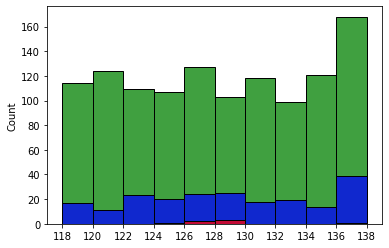

In [ ]:
import seaborn as sns 
hist, bins = np.histogram(train_coords)
sns.histplot(train_coords[:,0],bins=bins , color = "green" )
sns.histplot(val_coords[:,0],bins=bins ,color = "blue")
sns.histplot(test_ROI_coord_stacked[:,0],bins=bins ,color = "red")
plt.xticks(bins)

# 🟡 6 ResNet50 model <a id="6"></a>

## 6.1 Create ResNet50 model <a id="6.1"></a>

In [ ]:
from keras.models import Model

pretrained_model2= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   weights="imagenet")

for layer_no , layer in zip(range(1,len(pretrained_model2.layers)+1),pretrained_model2.layers): #176 Layers
#     if layer_no > 172:
#         layer.trainable=True
#     else:
        layer.trainable=False
    
#     print(layer_no)
x = pretrained_model2.output
x =  tf.keras.layers.Flatten()(x)
# initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.) #kernel_initializer=initializer
# x = Dense(2048, activation='relu', kernel_initializer = "he_uniform")(x)
# x = Dense(1024, activation='relu',kernel_initializer = "he_uniform",kernel_regularizer = L2())(x)
# x =Dropout(0.4)(x)

x = Dense(512, activation='relu',kernel_regularizer = L2(0.05))(x)
# x = Dense(128, activation='relu')(x)#,kernel_initializer = "he_uniform" 
# x = Dense(256, activation='relu',kernel_initializer = "he_uniform" ,kernel_regularizer = L2())(x)

x = Dense(64, activation='relu' ,kernel_regularizer = L2())(x)
x = Dense(2,activation='relu',kernel_regularizer = L2())(x)
prediction= LeakyReLU(0.3)(x)
resnet50_model = Model(inputs=pretrained_model2.input, outputs=prediction)


2023-01-02 19:45:34.472290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-02 19:45:34.500759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-02 19:45:34.501512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-02 19:45:34.502573: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [ ]:
resnet50_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# import tensorflow_addons as tfa
# clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=10e-4,
#     maximal_learning_rate=0.1,
#     scale_fn=lambda x: 1/(2.**(x-1)),
#     step_size=2 * 32
# )

In [ ]:
checkpoint_filepath = '/resnet/checkpoint'

resnet_model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

## 6.2 Compile Model <a id="6.2"></a>

In [ ]:
resnet50_model.compile(optimizer=Adam(0.001),loss='mse',metrics=['mae'])

## 6.3 Fit Model <a id="6.3"></a>

In [ ]:
start_time = time.time() #in Sec
 
history = resnet50_model.fit(train_imgs , train_coords , validation_data = (val_imgs,val_coords), epochs=200,batch_size = 64,callbacks=[resnet_model_checkpoint_callback])

end_time =  time.time()

print("Trining_time: ",(end_time-start_time)//60 , "Min")

2023-01-02 19:45:39.106666: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2023-01-02 19:45:43.363688: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


19/19 [==============================] - 10s 237ms/step - loss: 2228.2930 - mae: 28.4897 - val_loss: 251.3225 - val_mae: 10.8840
Epoch 2/200
19/19 [==============================] - 3s 158ms/step - loss: 197.3485 - mae: 8.6850 - val_loss: 147.0426 - val_mae: 6.6067
Epoch 3/200
19/19 [==============================] - 3s 158ms/step - loss: 123.7691 - mae: 5.5797 - val_loss: 119.8993 - val_mae: 5.5042
Epoch 4/200
19/19 [==============================] - 3s 157ms/step - loss: 96.1436 - mae: 4.1814 - val_loss: 101.0945 - val_mae: 4.6486
Epoch 5/200
19/19 [==============================] - 3s 158ms/step - loss: 81.2308 - mae: 3.3906 - val_loss: 93.6749 - val_mae: 4.4262
Epoch 6/200
19/19 [==============================] - 3s 157ms/step - loss: 72.0050 - mae: 2.9407 - val_loss: 87.4610 - val_mae: 4.2610
Epoch 7/200
19/19 [==============================] - 3s 157ms/step - loss: 65.1077 - mae: 2.6214 - val_loss: 82.2037 - val_mae: 4.2160
Epoch 8/200
19/19 [==============================] - 3s 

 ## 6.4 Losses Graphs <a id="6.4"></a>

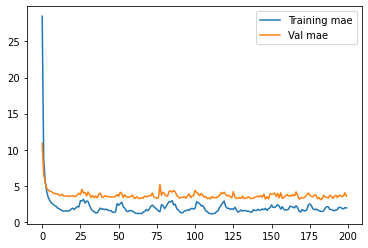

In [ ]:
plt.plot(history.history['mae'], label = "Training mae")
plt.plot(history.history['val_mae'], label = "Val mae")
plt.legend()
plt.show()

# 🟡 7 Make Predications <a id="7" > <a>

## 7.1 Radial Error Function <a id="7.1" > <a>

In [ ]:
def mean_radial_error_landmark(x_true,y_true,x_pred,y_pred):
    delta_x_2 =  np.power( ( np.subtract(x_true , x_pred) )*0.1 , 2) #(2,4)
    delta_y_2 =  np.power( ( np.subtract(y_true, y_pred ) )*0.1 , 2) #(2,4)

    radial_error_lm_ex = np.sqrt(np.add(delta_x_2,delta_y_2)) #(2,4)

    radial_error_lm = np.sum(radial_error_lm_ex, axis = 0,keepdims=True) #(1,4)

    mean_radial_error_lm = radial_error_lm / x_true.shape[0]

    return radial_error_lm_ex,mean_radial_error_lm

## 7.2 Successful Detection Rate Function (SDR) <a id="7.2" > <a>

In [ ]:
def sdr(mre,mre_range):
    return((mre[mre<=mre_range].shape[0])/mre.shape[0])*100

In [ ]:
prediction_ResNet50=resnet50_model.predict(test_ROI_images_stacked)

print("MAE: ",MAE_SKL(test_ROI_coord_stacked, prediction_ResNet50))

MAE:  37.38689735412598


In [ ]:
print(test_ROI_images_stacked.shape)
print(prediction_ResNet50.shape)
print(test_ROI_coord_stacked.shape)

(50, 256, 256, 3)
(50, 2)
(50, 2)


## 7.3 Mean Radial Error <a id="7.3" > <a>

In [ ]:
x_true = test_ROI_coord_stacked[:,0]
y_true = test_ROI_coord_stacked[:,1]

ResNet_x_pred = prediction_ResNet50[:,0]
ResNet_y_pred = prediction_ResNet50[:,1]

ResNet_radial_error_lm_ex , ResNet_mre_each_lm = (mean_radial_error_landmark(x_true,y_true,ResNet_x_pred,ResNet_y_pred))
print("Mean Radial Error: ",ResNet_mre_each_lm)


Mean Radial Error:  [6.16116166]


## 7.4 BoxPlot <a id="7.4" > <a>

Text(0.5, 1.0, 'Radial Error for each LandMark 19 across 50 test image (ResNet)')

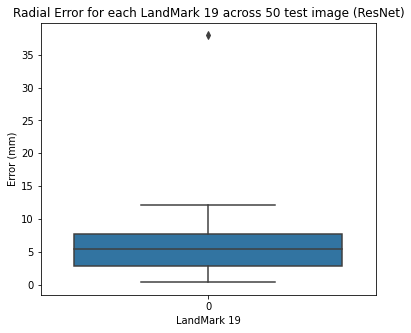

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data = ResNet_radial_error_lm_ex[:])
plt.xlabel("LandMark {}".format(landmark_n) )
plt.ylabel("Error (mm)")
plt.title("Radial Error for each LandMark {} across 50 test image (ResNet)".format(landmark_n))

In [ ]:
np.save('boxPlot_L{}.npy'.format(landmark_n),ResNet_radial_error_lm_ex[:])
from IPython.display import FileLink
FileLink("./boxPlot_L{}.npy".format(landmark_n))

/kaggle/working/boxPlot_L19.npy

In [ ]:
resnet50_model.save('resnet50_L{}.h5'.format(landmark_n))
from IPython.display import FileLink
FileLink("./resnet50_L{}.h5".format(landmark_n))

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


/kaggle/working/resnet50_L19.h5

In [ ]:
boxplots = []
for i in range(1,20):
    lm=np.load("/kaggle/input/boxplots/boxPlot_L{}.npy".format(i))
    boxplots.append(lm)
    

print(np.asarray(boxplots).shape)


19


Text(0.5, 1.0, 'Radial Error for each LandMark across 50 test image (ResNet)')

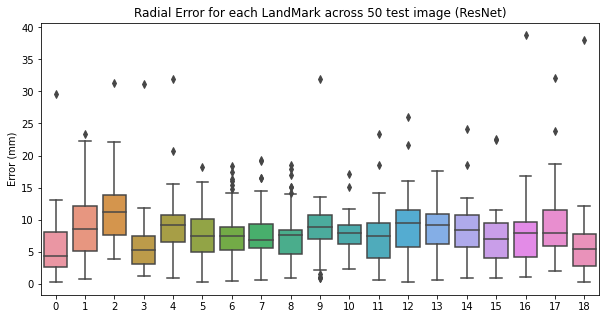

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5)),
sns.boxplot(data = boxplots)
# plt.xlabel("LandMark 10")
plt.ylabel("Error (mm)")
plt.title("Radial Error for each LandMark across 50 test image (ResNet)")

In [ ]:
boxplots_arr=np.transpose(boxplots)
boxplots_arr.shape

(50, 19)

In [ ]:
sdr_under_2 = [sdr(boxplots_arr[:,1],2) for i in range(boxplots_arr.shape[1])]
sdr_under_2_5 = [sdr(boxplots_arr[:,i],2.5) for i in range(boxplots_arr.shape[1])]
sdr_under_3 = [sdr(boxplots_arr[:,i],3) for i in range(boxplots_arr.shape[1])]
sdr_under_3_5 = [sdr(boxplots_arr[:,i],3.5) for i in range(boxplots_arr.shape[1])]
sdr_under_4 = [sdr(boxplots_arr[:,i],4) for i in range(boxplots_arr.shape[1])]

print(f"SDR under 2mm = {sdr_under_2}")
print(f"SDR under 2.5mm = {sdr_under_2_5}")
print(f"SDR under 3mm = {sdr_under_3}")
print(f"SDR under 3.5mm = {sdr_under_3_5}")
print(f"SDR under 4mm = {sdr_under_4}")

SDR under 2mm = [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
SDR under 2.5mm = [24.0, 10.0, 0.0, 14.000000000000002, 6.0, 8.0, 12.0, 8.0, 8.0, 10.0, 2.0, 14.000000000000002, 10.0, 4.0, 10.0, 6.0, 10.0, 6.0, 20.0]
SDR under 3mm = [34.0, 14.000000000000002, 0.0, 24.0, 8.0, 12.0, 16.0, 10.0, 12.0, 10.0, 8.0, 20.0, 12.0, 6.0, 10.0, 8.0, 12.0, 10.0, 26.0]
SDR under 3.5mm = [40.0, 18.0, 0.0, 32.0, 10.0, 16.0, 16.0, 18.0, 16.0, 12.0, 12.0, 24.0, 14.000000000000002, 8.0, 10.0, 16.0, 20.0, 10.0, 32.0]
SDR under 4mm = [48.0, 22.0, 2.0, 42.0, 14.000000000000002, 24.0, 20.0, 20.0, 22.0, 12.0, 12.0, 26.0, 16.0, 8.0, 10.0, 24.0, 22.0, 10.0, 36.0]


In [ ]:
landmark = np.arange(1,20)
sdr_results = pd.DataFrame({"LM":landmark,
                        "2 mm":sdr_under_2,
                        "2.5 mm":sdr_under_2_5,
                        "3 mm":sdr_under_3,
                        "3.5 mm":sdr_under_3_5,
                        "4 mm":sdr_under_4})
sdr_results.set_index(['LM'])


,2 mm,2.5 mm,3 mm,3.5 mm,4 mm
LM,,,,,
1,4.0,24.0,34.0,40.0,48.0
2,4.0,10.0,14.0,18.0,22.0
3,4.0,0.0,0.0,0.0,2.0
4,4.0,14.0,24.0,32.0,42.0
5,4.0,6.0,8.0,10.0,14.0
6,4.0,8.0,12.0,16.0,24.0
7,4.0,12.0,16.0,16.0,20.0
8,4.0,8.0,10.0,18.0,20.0
9,4.0,8.0,12.0,16.0,22.0
